# TMA 01, question 3

**Name**: [Pablo Toledo]
    
**PI**: [C4451553]


In this question, you will examine a set of results of an Open University online quiz (iCMA). These are genuine results from a level 1 module, though the data has been anonymised by using cryptographic hashes to obscure personal information.

The rubric for the iCMA was similar to that for TM351. Students are allowed to take the iCMA as many times as they like, with only their highest score counting. Students have to achieve a threshold score of 40% to pass this iCMA. The iCMA remained open until the module end date. 

The question has several parts, taking you through the data analysis pipeline. Most of the question parts concern with various analyses of the data. The final part of the question looks at some issues with anonymisation of the data.

Record all your activity and observations in this notebook. Generate additional notebook cells as required. 

Ensure that you have made of copy of the TMA01_Question5 Notebook and renamed it so that it has your personal identifier (PI) at the front of the Notebook filename (i.e. YourPI_TMA01_Question5.ipynb). You must submit this notebook as part of your TMA submission.

In [1]:
# Load the necessary libraries here:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('notebook_repr_html', False)
pd.set_option('max_rows', 20)


# If you require additional libraries to answer any questions 
# then import them as necessary.

## <a name="contents"></a> Contents
* a) [Import and cleaning](#a) (8 marks)
* b) [Number of attempts](#b) (4 marks)
* c) [Timescales](#c) (3 marks)
* d) [Time and day of quiz](#d) (8 marks)
* e) [Difficulty of questions](#e) (7 marks)
* f) [Data investigation summary](#f) (5 marks)
* g) [Anonymisation and privacy](#g) (10 marks)

# <a name="a"></a> a)  Import and cleaning (8 marks) 
([Contents](#contents))

In this part of the question you will load and prepare the data file. You will also quickly examine the data with summaries and visualisations.

Read the csv file `data/icma.csv` into a DataFrame called `icma_df` and display the first 3 rows.

Note that the 'Started on' and 'Completed' columns contain datetimes and should be converted on import. Also not that a single hyphen is used in the file to denote missing numerical data; hyphens should be converted to 'NA' on import.

Also note that it can be easier to see the data if you transpose the dataframe you display: append `.T` to your display function call.

In [2]:
#read icma.csv data into dataframe
icma_df = pd.read_csv('data/icma.csv', parse_dates=['Started on','Completed'], na_values=['-'])
#display first 3 rows
icma_df.head(3).T


                                                     0  \
Surname               b7a1c60935d72dd330a48021b25ec0c4   
First name            34f9e4c9be637c99f9b2cfb3f5d1994c   
OU Computer Username  b675bd4a9a46ec179a894866ad80b71d   
Personal Identifier   ec0b15df629ce1fc564462e81ba6b267   
Institution                                        NaN   
Department                                         NaN   
Email address         b3d15cf86ba4dbbafa458124c09ca816   
State                                         Finished   
Started on                         2016-01-29 06:56:00   
Completed                          2016-02-08 10:31:00   
...                                                ...   
Q. 11 /1.00                                       0.89   
Q. 12 /1.00                                          1   
Q. 13 /1.00                                          1   
Q. 14 /1.00                                          1   
Q. 15 /1.00                                       0.89   
Q. 16 /1.00   

Check to see how the columns are typed

In [3]:
# Enter your code here.
icma_df.dtypes

Surname                         object
First name                      object
OU Computer Username            object
Personal Identifier             object
Institution                    float64
Department                     float64
Email address                   object
State                           object
Started on              datetime64[ns]
Completed               datetime64[ns]
                             ...      
Q. 11 /1.00                    float64
Q. 12 /1.00                    float64
Q. 13 /1.00                    float64
Q. 14 /1.00                    float64
Q. 15 /1.00                    float64
Q. 16 /1.00                    float64
Q. 17 /1.00                    float64
Q. 18 /1.00                    float64
Q. 19 /1.00                    float64
Q. 20 /1.00                    float64
dtype: object

In [4]:
# Recalculate the 'Time taken' values.
icma_df['Time taken'] = icma_df['Completed'] - icma_df['Started on']
icma_df.head(3).T

                                                     0  \
Surname               b7a1c60935d72dd330a48021b25ec0c4   
First name            34f9e4c9be637c99f9b2cfb3f5d1994c   
OU Computer Username  b675bd4a9a46ec179a894866ad80b71d   
Personal Identifier   ec0b15df629ce1fc564462e81ba6b267   
Institution                                        NaN   
Department                                         NaN   
Email address         b3d15cf86ba4dbbafa458124c09ca816   
State                                         Finished   
Started on                         2016-01-29 06:56:00   
Completed                          2016-02-08 10:31:00   
...                                                ...   
Q. 11 /1.00                                       0.89   
Q. 12 /1.00                                          1   
Q. 13 /1.00                                          1   
Q. 14 /1.00                                          1   
Q. 15 /1.00                                       0.89   
Q. 16 /1.00   

`describe()` the `icma_df` DataFrame. (Again, you may find the results easier to see if you transpose `.T` the description.)

In [5]:
# Enter your code here.
icma_df.describe().T

            count                     mean                      std  \
Institution     0                      NaN                      NaN   
Department      0                      NaN                      NaN   
Time taken    726  16 days 09:30:07.768595  29 days 07:00:03.466198   
Grade/20.00   726                  17.1574                  2.75742   
Q. 1 /1.00    821                 0.994348                0.0589023   
Q. 2 /1.00    809                 0.949184                 0.149324   
Q. 3 /1.00    796                 0.895415                 0.211043   
Q. 4 /1.00    808                 0.884814                  0.24743   
Q. 5 /1.00    782                 0.903619                  0.12584   
Q. 6 /1.00    761                 0.771498                 0.247875   
...           ...                      ...                      ...   
Q. 11 /1.00   755                 0.926702                 0.169854   
Q. 12 /1.00   740                 0.892689                 0.207733   
Q. 13 

All iCMA attempts are recorded in the data, whether or not they are finished. The `State` column shows the completion state. What are the different values for State, and how many are in each state? How many questions were answered in each state?

In [6]:
# First we group the table by state, and then apply the count function (we could also use a pivot table
# but the results are the same). 
# If we then transpose the table we can easily see we have 2 kinds of states:'Finished' and 'In progress'
# There are 726 'finished' ones (see Personal Identifier row), and 108 'In progress'
# For each question we can now also see how many questions were answered (e.g. 726 of those students who 
# finished answered question 1, but only 95 who are still in progress have answered question 1)

icma_df.groupby('State').count().T


State                 Finished  In progress
Surname                    726          108
First name                 726          108
OU Computer Username       726          108
Personal Identifier        726          108
Institution                  0            0
Department                   0            0
Email address              726          108
Started on                 726          108
Completed                  726            0
Time taken                 726            0
...                        ...          ...
Q. 11 /1.00                706           49
Q. 12 /1.00                701           39
Q. 13 /1.00                705           52
Q. 14 /1.00                704           44
Q. 15 /1.00                702           35
Q. 16 /1.00                705           49
Q. 17 /1.00                705           44
Q. 18 /1.00                689           20
Q. 19 /1.00                696           20
Q. 20 /1.00                696           30

[31 rows x 2 columns]

Use Pandas `hist()` to generate a histogram of number of tests for each Grade. As the test is out of 20, use 21 bins (0--20 inclusive). Add a suitable title (use `plt.title()`).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0xafeaf0ac>]], dtype=object)

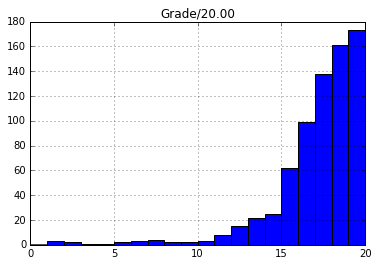

In [7]:
icma_df.hist(column='Grade/20.00', bins=range(21))
#NB plt.title, plt.xlabel and plt.ylabel don't work here. Unable to find solution online. 
#plt.xlabel('Grade/20')
#plt.ylabel('Total Students')
#plt.title("Total number of tests per grade/20")

The above shows only completed tests. What are the marks awarded for 'In progress' tests?

Hint: Sum the question scores. You need to tell .sum() to add by row, not column. Use `fillna()` to include rows with no answered questions.

array([<matplotlib.axes._subplots.AxesSubplot object at 0xafd4338c>,
       <matplotlib.axes._subplots.AxesSubplot object at 0xafd1954c>], dtype=object)

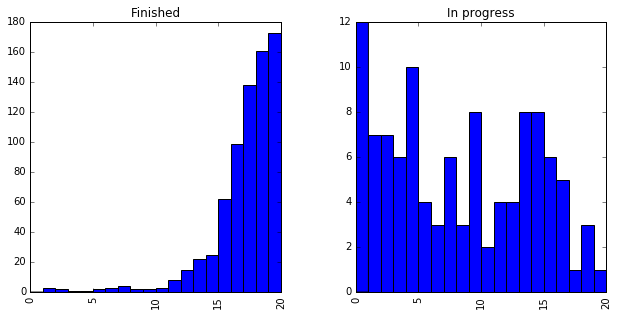

In [8]:
#get list of columns, and discard all non-answer columns
answer_columns = list(icma_df)
answer_columns = answer_columns[12:]  #discard first 12 columns 

# now replace all NaNs with 0s for the answer columns only
icma_df[answer_columns] = icma_df[answer_columns].fillna(0)

# Next, recalculate all the students' scores by summing answer columns for each row, 
# and update grade column with result 
icma_df['Grade/20.00'] = icma_df[answer_columns].sum(axis=1) 

#now we can replot the histogram, and also group by state to compare..
icma_df.hist(column='Grade/20.00', bins=range(21), by=['State'], figsize=(10,5))

**Question:** 
What do these tables and charts tell you?  Comment on:

1. the proportion of complete and incomplete quizzes, and which data is present or missing in which state.

1. the range of values for the time taken.

1. the ranges of the overall grade (`Grade/20.00`) and the marks for individual questions (`Q. 1/1.00` to `Q. 20/1.00`).

1. the distribution of marks of complete and incomplete quizzes.

1. the number of questions answered in quizzes.

**Write your answer here** _(200 words)_
Looking at the table which shows the number of questions answered in each state, we can see there are 726 finished attempts (87%), and 108 unfinished attempts (13%). 

The table of summary statistics shows us that the average time taken to complete a quiz is 16 days, 9 hours. However, the maximum time taken is an enormous 154 days, which is probably skewing the average. This is supported by a large standard deviation (29 days!), suggesting a highly spread out distribution. This suggests a wide range of study patterns for different students.

While there is a large range in scores for each question (0 to 1 in most cases),
the average score for each question is very high, with only 2 questions (Q18 and Q20) having a mean score of less than 0.75. Interestingly, one would expect the later questions to have lower scores due to being more difficult, but the data doesn't show this, with some extremely high average marks towards the end of the quiz (such as question 16 with an average of 99%!).

In terms of the distribution of marks, we can see from the histogram that the majority of students scored 15 or above, with the average score for all students being 17.16. For students who didn't complete, there is an interesting peak at around 15/20, suggesting that had students clicked submit they would have performed better than they expected to.

We can also see differences in how many students attempted a question, and how many gave up. Q1 for instance, was answered by 821 students (98%), compared to Q18 which was only answered by 709 students (83%).


In [9]:
# For convenience, hold the selectors for the completed and incomplete attempts
finished = icma_df['State'] == 'Finished'
in_progress = ~finished

# e.g. icma_df[finished] is just the rows corresponding to finished attempts.

In [10]:
# For convenience, hold a list of column names that store question marks.
question_columns = ['Q. 1 /1.00', 'Q. 2 /1.00',
       'Q. 3 /1.00', 'Q. 4 /1.00', 'Q. 5 /1.00', 'Q. 6 /1.00', 'Q. 7 /1.00',
       'Q. 8 /1.00', 'Q. 9 /1.00', 'Q. 10 /1.00', 'Q. 11 /1.00', 'Q. 12 /1.00',
       'Q. 13 /1.00', 'Q. 14 /1.00', 'Q. 15 /1.00', 'Q. 16 /1.00',
       'Q. 17 /1.00', 'Q. 18 /1.00', 'Q. 19 /1.00', 'Q. 20 /1.00']

# e.g. icma_df[question_columns] is just the columns for the individual questions

Aspects of the data you will explore further are:

1. how many attempts each student has made

2. how the time taken for the iCMAs affects the score

3. times and dates of starting and finishing iCMAs

4. which questions are harder than others

5. summarising these results and indicating interesting aspects

6. anonymity and privacy of the data

# <a name="b"></a>b) Number of attempts (4 marks)
([Contents](#contents))

Students can make multiple attempts at a quiz. In this part of the question, you will see how many attempts different students made.

Count the number of attempts by each student.

Store the results in a new data frame, `attempt_counts_df`. This new dataframe should have one row for each student, with the columns showing the number of quiz attempts for that student.

In [11]:
# group the icma data by personal identifier - this will be unique for each student
# this gives us a count of attempts by each student
attempt_counts_df = pd.pivot_table(icma_df, index=['Personal Identifier'],aggfunc='count')
attempt_counts_df.head(5)

                                  Completed  Department  Email address  \
Personal Identifier                                                      
003047356d0f4b451008051bc7580a61          1           0              1   
00a0827e06178d3cc66ca00614da7224          1           0              1   
00a3ecab1901a4df63f7bbe9305c9273          2           0              2   
00b0749a276fadc59c67593679cdd352          2           0              2   
00ba4c0d58a2a240bfb77191c790b8a8          1           0              1   

                                  First name  Grade/20.00  Institution  \
Personal Identifier                                                      
003047356d0f4b451008051bc7580a61           1            1            0   
00a0827e06178d3cc66ca00614da7224           1            1            0   
00a3ecab1901a4df63f7bbe9305c9273           2            2            0   
00b0749a276fadc59c67593679cdd352           2            2            0   
00ba4c0d58a2a240bfb77191c790b8a8     

Group `attempt_counts_df` by `Completed` to show the number of students who completed each number of quizzes. (For example, how many students completed no quiz attempts, how many completed 3 attempts, and so on.) Give both the numerical results and a bar chart visualisation.

In [12]:
# pivot again, this time on completed column, count completed and discard all columns apart from one
attempts_summary = pd.pivot_table(attempt_counts_df, index=['Completed'],values=['Email address'],aggfunc='count')
attempts_summary.reset_index(inplace=True) #turn Completed into a regular column, and rename columns
attempts_summary.rename(columns={'Completed':'Quiz Attempts Completed', 'Email address':'Total Students'}, inplace=True)
attempts_summary

   Quiz Attempts Completed  Total Students
0                        0              90
1                        1             493
2                        2              51
3                        3              19
4                        4               4
5                        5               3
6                        6               4
7                        8               1
8                       11               1

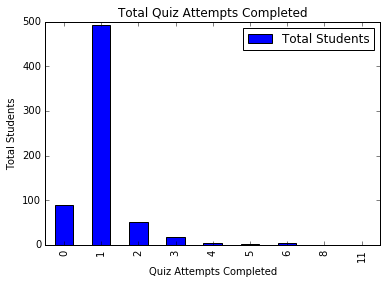

In [13]:
#now plot the above table
attempts_summary.plot.bar(x='Quiz Attempts Completed', title="Total Quiz Attempts Completed")
plt.xlabel('Quiz Attempts Completed')
plt.ylabel('Total Students')

Find the PIs of students that completed the quiz more than five times, and how many times they completed the quiz. Display the results in order of number of completed quizzes.

In [14]:
# Select rows from pivot table where Completed count > 5
# apply a sort by completed
over_5_quiz_attempts = attempt_counts_df[attempt_counts_df['Completed']>5].sort_values(by=['Completed'])
over_5_quiz_attempts['Completed']

Personal Identifier
5355523788afb249175bdb8b1d12380e     6
86a729acd802df7d50607198c2185979     6
c93061b5be7add3dde1d71cf78664b69     6
f09d619892b5f1c63015683b6217fe54     6
8db4ad5565daec67476734944a321ee7     8
de9b3258c50941ba6ff048c203194c8b    11
Name: Completed, dtype: int64

Find the PI of the student who completed the most number of quizzes. Show the datetime and overall grade of their attempts, in datetime order.

In [15]:
#go back to original attempt_counts_df dataframe, and call idxmax method to return the index of the row with the max count
#i.e. the PI of the student with the max number of attempts
most_quiz_attempts_pi = attempt_counts_df.idxmax()
most_quiz_attempts_pi = most_quiz_attempts_pi['Completed']

#now use PI of student with most attempts to select all his / her rows from original dataframe
attempts = icma_df[icma_df['Personal Identifier'] == most_quiz_attempts_pi]
#sort attempts by completed date
attempts.sort_values(by=['Completed'])
#select just the columns we want
attempts[['Completed','Grade/20.00']]

              Completed  Grade/20.00
34  2016-02-04 14:20:00        12.07
88  2016-02-11 15:14:00        12.33
97  2016-02-13 13:21:00        13.11
103 2016-02-14 13:13:00        14.00
105 2016-02-14 14:24:00        17.50
109 2016-02-15 14:47:00        15.45
111 2016-02-15 15:19:00        16.73
112 2016-02-15 15:42:00        16.34
121 2016-02-16 14:43:00        18.62
123 2016-02-16 15:20:00        18.34
125 2016-02-16 15:56:00        19.12

Many students started a quiz but did not complete any. What would their scores have been if they had pressed the "submit" button on the quiz? Plot the results as a histogram (with 21 bins).

First, find the PIs of students with zero completed quizzes. 

_Hint:_ The Personal Identifier is the `index` of the `attempt_counts` DataFrame. Store the relevant Personal Identifiers in a variable called `zero_attempted`.

In [16]:
# first, select rows with completed count of 0
zero_attempted = attempt_counts_df[attempt_counts_df['Completed']==0]
# next, grab the index column (which is the student PI)
zero_attempted = zero_attempted.index
zero_attempted

Index(['01679542bebfb044ca81f73848bc322c', '01c05a8732e2091d2aceab53f6bcc87d',
       '065f17ebad6c6258dd55293d7efbf4b5', '0826a6d1da7c62e82c22d7ff4bc6c697',
       '0d5b2caddd3153ba426efecc6bdd9f05', '0fac3c1704877efe52fddc6e1162e5c3',
       '1198ef963362eb127f888e263a012daf', '1352e5ad87b7171858b955d02cf4b5f4',
       '13a5cd6605cb7f8c09fa812bdf575184', '17a3d70bad7c6a0355a9c65e6f694e05',
       '181b6b7816deae79627a1a4942ec1189', '184995ce7ac197b6752aac38c4072ebd',
       '1fa06ea1b35d1b360f9a8c1395e07f6a', '228cb5a4d543bfa880d7d90bdb4d15e2',
       '245ec7644f5159c297eb2b1b82965be1', '256dce1fd1523049b0da537a408909b3',
       '25c8e17fe87b1b47294e65ac8755ea09', '29011958b5531db313faa15ac46018b2',
       '2ea13f5044a777bb718bd38879d90344', '31e9d5931045f0eb995e89e2ca4e5bfb',
       '35635ff8e5cc20633c4ffa11380a4af6', '3739ccdfa542a82f0522506d7aa115c7',
       '3830174918e12839f30698416a4af9a3', '38d51786877591180a4f1446f09642fb',
       '3d32c15b73037fde7c93ca7ddba88206', '3dddb096

The code below will select the rows of the `icma_df` DataFrame where the Personal Identifier is in the `zero_attempted` set you just identified. Use it to find the scores each of these quiz attempts would have been awarded had the student simply pressed 'submit'. Plot those results as a histogram (with 21 bins).

Ensure you find the total per student, not the total per question.

In [17]:
unsubmitted_attempts = icma_df[icma_df['Personal Identifier'].isin(zero_attempted)]
unsubmitted_attempts

                              Surname                        First name  \
6    1b4a4ba779ce44b1d2ce658bbd199c14  7130f665bca85623df6944f349e4080f   
27   c574d948293e2fce20f1d2c3ad2e7c52  6225db62f77fbf8cd896ab214c1b183d   
57   a551255aba280834b0f4800d42ef1bda  ac0592b0dcb141b624b6512c3a5a207e   
70   6627906f306950b8d77614a198c6ebd7  3949260500a1a05c4cd3a97a4b35f9f4   
90   ff99f61214c921e5a2ccc1acdadacc78  88c23c38cef5a19b543da3c08d7636bb   
92   966bf06d585f2a4c0680f3dec8da7bca  3900772a0dc83c545ff5e17f08cebf9e   
93   75ecbcc2ee1ecdf832183cdb019fa07c  10b36dc315e8669cb5d6a31ef431be67   
99   a0df726b4cab6f7c18bb05c0e697b865  10aab2ffe5e17184ab06b2c388811e11   
110  adf1a5fdec02079b63e310a4236c0479  9e2f6a17030dd80c1c4267e17e494835   
115  fea016e501612657bebc4d48d0abd55f  be9f54fd90c1265489eed9c23d485487   
..                                ...                               ...   
747  a5450848d8ec407c9fae1fe0c6ef0440  3cf7c9f8a5a7d6fe3be50d0f8409fc20   
748  4de5cabc03a123aa9243

array([[<matplotlib.axes._subplots.AxesSubplot object at 0xafc9d98c>]], dtype=object)

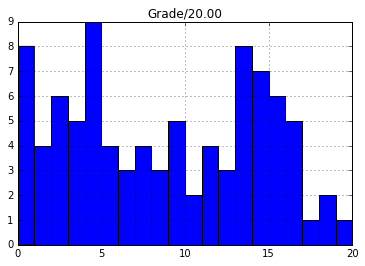

In [18]:
#we simply select the grade/20 column from unsubmitted_attempts and plot this, as we've already 
#set the score of non-answered questions to 0 and recalculated the total score 
unsubmitted_attempts.hist(column='Grade/20.00', bins=range(21))
#NB plt.title, plt.xlabel and plt.ylabel don't work here. Unable to find solution online. 
#plt.xlabel('Grade/20')
#plt.ylabel('Total Students')
#plt.title("Grade/20 for students who didn't submit test")

## Analysis
What do these graphs and data extracts tell you about how students take quizzes?

**Write your answer here** _(100 words)_
These graphs and data tell us that while most students (74%) attempt and complete the quiz just once, there are a sizable proportion (13.5%) that attempt the quiz but don't complete it, even though by doing so they might have attained a reasonable grade (15 out of 90 students who didn't click submit would have scored 15/20 or higher). Conversely 12% of students complete the quiz multiple times in order to gain a higher score. One student even completed the quiz 11 times, increasing his/her score from 12 to 19. These results probably show differing study patterns in students, with some more motivated than others to score highly on the ICMAs. These results could also indicate students who have completed a quiz, but simply forgot to press submit.

# <a name="c"></a> c) Timescales (3 marks)
([Contents](#contents))

Does the time taken to complete a quiz have any bearing on the score for that quiz attempt? In other words, does taking your time over a quiz lead to a higher mark, or vice versa?

Add a new column to the `icma_df` DataFrame that holds the number of hours for that quiz attempt. 

The 'Time taken' data are `timedelta` objects. The `.total_seconds()` method of `timedelta` gives the number of seconds in that time interval. You will need to `.apply()` that function to every row of the `icma_df` DataFrame.

`describe` the distribution of times. Plot a histogram of number of quiz attempts against time taken.

In [19]:
# create a new 'Hours taken' column based on 'Time taken', and apply function to divide 
# time delta (i.e. a time period) by a 1 hour time delta, to find the number of hours
icma_df['Hours taken'] = icma_df['Time taken'].apply(lambda x: x / np.timedelta64(1, 'h'))

#now describe the distribution of times
icma_df['Hours taken'].describe()

count     726.000000
mean      393.502158
std       703.000963
min         0.016667
25%         0.583333
50%         1.766667
75%       522.816667
max      3696.966667
Name: Hours taken, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0xafb4e5ec>]], dtype=object)

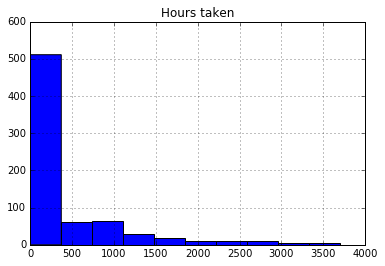

In [20]:
# now plot a histogram of the hours taken
icma_df.hist(column='Hours taken')
#NB plt.title, plt.xlabel and plt.ylabel don't work here. Unable to find solution online. 
#plt.xlabel('Hours taken')
#plt.ylabel('Total Students')
#plt.title("Number of hours taken to complete each test")

Many quizzes are completed quickly. How many are completed in less than two hours? Plot a histogram of number of quizzes completed by time. Include only the quizzes completed in less than two hours, and use 40 bins to show the detail.

In [21]:
#select all rows where hours taken < 2
quizzes_under_2_hours = icma_df[icma_df['Hours taken']<2]
quizzes_under_2_hours

                              Surname                        First name  \
2    aa8af604652b6b631f11061fe8c69809  ec83707bbca209e51a65e9864ac8baeb   
3    615bbea6dd8739d5aea38087d86175ea  19f2b4e849a31f6f0c43781e40fe14a5   
7    fe0a1584a31c05fc75c52f7fd539fc0c  ac6e926ec3ef752a634271124d6328e7   
9    1209bb7c8834eac267c8c79c7cf0adb0  4360e2dcc2592270feb9da346e64a495   
11   c201bd2ac4e934165ef71882b28d4fe3  33957e81e4dc94e74fb958ff1ce34e4e   
12   8933e77b83eee991c3d3aae3c88b8176  d3d2792b4f002c766a99bb7152ccf3ee   
13   cad2ee9ce762fd64e8235c070706f2d0  b0197af0bb2c037fd5c6bbe840b06c6b   
14   fc923dd175c9c06984df402f39ed0ab0  529131b502682340edc778ed6d24c134   
16   f2e29b6dc252b243a626b0d8c44e1608  de425c58493063ed07bcc28a0b7d8e40   
17   1f0a357744ee3b1a21d568e733edccfe  41a8d5bf5bb0a30b1dca315181dc3eb9   
..                                ...                               ...   
819  12aa76b64b26333515b84f3995754eb7  f14c6028d0cc32cc3010073b99450f76   
820  a559c2a31c758cba17c5

array([[<matplotlib.axes._subplots.AxesSubplot object at 0xafb741cc>]], dtype=object)

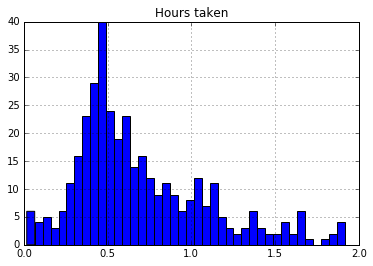

In [22]:
#plot histogram of hours taken with bin size of 40
quizzes_under_2_hours.hist(column='Hours taken', bins=40)
#NB plt.title, plt.xlabel and plt.ylabel don't work here. Unable to find solution online. 
#plt.xlabel('Hours taken')
#plt.ylabel('Total Students')
#plt.title("Number of hours taken to complete each test (for attempts less than 2 hours long)")

Plot scatter plots of time taken against grade, for all attempts and for attempts completed within two hours.

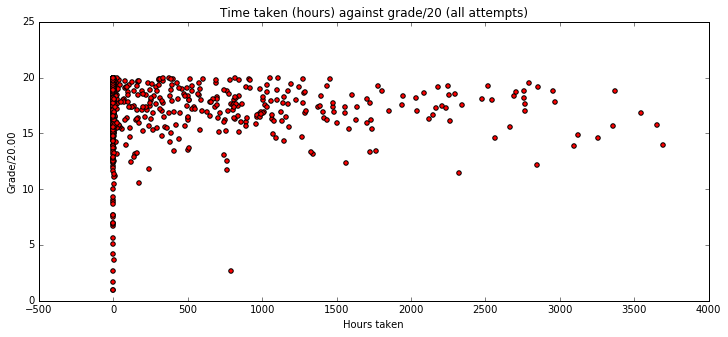

In [23]:
# scatter plot of time taken against grade for all attempts
icma_df.plot.scatter(x='Hours taken', y='Grade/20.00', 
                     color='red', 
                     title="Time taken (hours) against grade/20 (all attempts)",
                     figsize=(12,5))

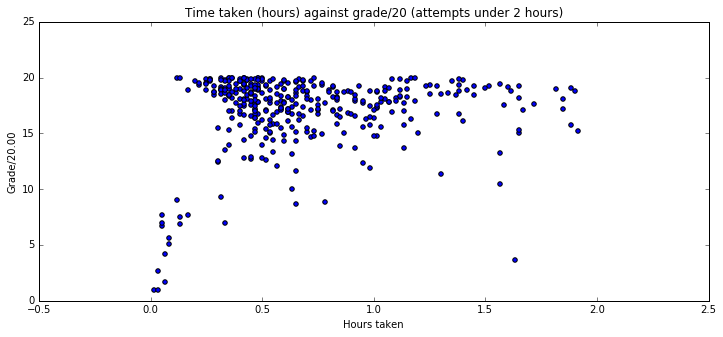

In [24]:
# scatter plot of time taken against grade for attempts less than 2 hours
quizzes_under_2_hours.plot.scatter(x='Hours taken', y='Grade/20.00', 
                     color='blue', 
                     title="Time taken (hours) against grade/20 (attempts under 2 hours)",
                     figsize=(12,5))

## Analysis
What does these plots and summaries of the data tell you about how the time to complete a quiz affects the score of that quiz?

**Write your answer here** _(100 words)_
From looking at scatter graphs we can clearly see that the majority of students complete their tests quickly (50% of students within 1.76 hours, 75% of students within 523 hours), and score highly (between 15 and 20). In the 2 hour scatter graph we can also see a clustering of high results around the half hour mark, with the grade falling slightly between half hour and 2 hours. In the other scatter graph we see this pattern more clearly, with the grade visibly dropping as the number of hours increases. Its also interesting to note that the grade also drops for students that completed within 15m. The later results could be explained by students leaving it too long to take the quiz, by which point they have forgotten the material. The former could conversely be explained by students rushing to complete the test and not taking the required to read and think about the questions.

# <a name="d"></a> d) Time and day of quiz (8 marks)
([Contents](#contents))

Does when a quiz is started or finished have any effect on its grade?

_Pandas_ doesn't like making scatter plots with time as one axis. This code will convert the start time of a quiz into an integer (number of seconds), add it to the `icma_df` DataFrame, then draw a scatter plot.

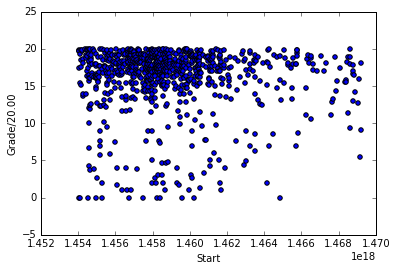

In [25]:
icma_df['Start'] = icma_df['Started on'].astype(np.int64)
icma_df.plot.scatter(x='Start', y='Grade/20.00')

Make a scatter plot of completion time against score.

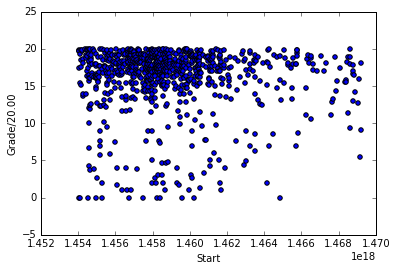

In [26]:
icma_df['End'] = icma_df['Completed'].astype(np.int64)
icma_df.plot.scatter(x='Start', y='Grade/20.00')

In [27]:
# The following line of code maps dates to day of the week with Monday=0, Sunday=6
icma_df['DoW'] = icma_df['Started on'].dt.weekday
icma_df[:3].T

                                                     0  \
Surname               b7a1c60935d72dd330a48021b25ec0c4   
First name            34f9e4c9be637c99f9b2cfb3f5d1994c   
OU Computer Username  b675bd4a9a46ec179a894866ad80b71d   
Personal Identifier   ec0b15df629ce1fc564462e81ba6b267   
Institution                                        NaN   
Department                                         NaN   
Email address         b3d15cf86ba4dbbafa458124c09ca816   
State                                         Finished   
Started on                         2016-01-29 06:56:00   
Completed                          2016-02-08 10:31:00   
...                                                ...   
Q. 15 /1.00                                       0.89   
Q. 16 /1.00                                          1   
Q. 17 /1.00                                          1   
Q. 18 /1.00                                          1   
Q. 19 /1.00                                       0.89   
Q. 20 /1.00   

How many quiz attempts were started on each day of the week? What were the average scores of those completed quiz attempts?

Show the numeric results of each of these questions, and produce a bar chart of the results.

Make a scatter plot of day of week against score.

In [28]:
# Show the number of quizzes started on each day of the week.
quizzes_by_dow = pd.pivot_table(icma_df, index=['DoW'], values=['Started on'], aggfunc='count')
quizzes_by_dow

     Started on
DoW            
0           135
1           123
2           132
3           133
4           104
5            89
6           118

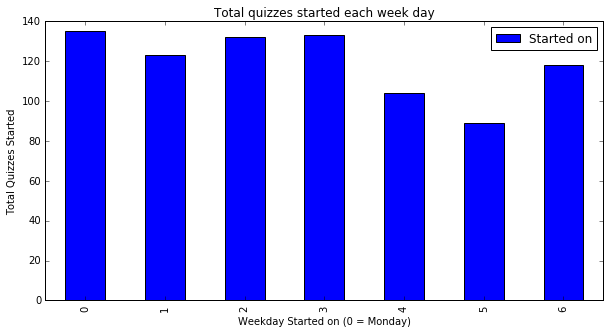

In [29]:
# Plot the results above as a bar chart.
quizzes_by_dow.plot.bar(title="Total quizzes started each week day",
                        figsize=(10,5),
                        color='blue')
plt.xlabel('Weekday Started on (0 = Monday)')
plt.ylabel('Total Quizzes Started')


In [30]:
# Show the mean score of quizzes started on each day of the week.
mean_quiz_score_by_dow = pd.pivot_table(icma_df, index=['DoW'], 
                                        values=['Grade/20.00'], 
                                        aggfunc='mean')
mean_quiz_score_by_dow

     Grade/20.00
DoW             
0      16.388593
1      16.093984
2      15.744621
3      15.585714
4      15.791635
5      15.662135
6      16.618051

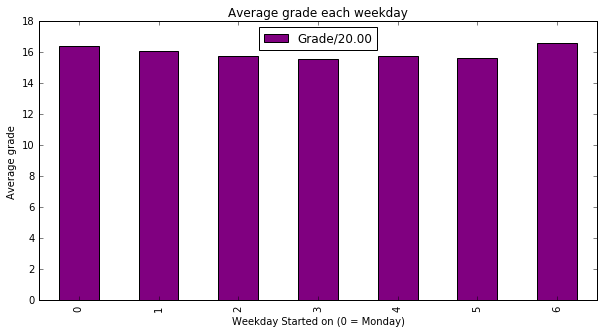

In [31]:
# Plot the results above as a bar chart.
mean_quiz_score_by_dow.plot.bar(title="Average grade each weekday", 
                               figsize=(10,5),
                               color='purple')
plt.xlabel('Weekday Started on (0 = Monday)')
plt.ylabel('Average grade')


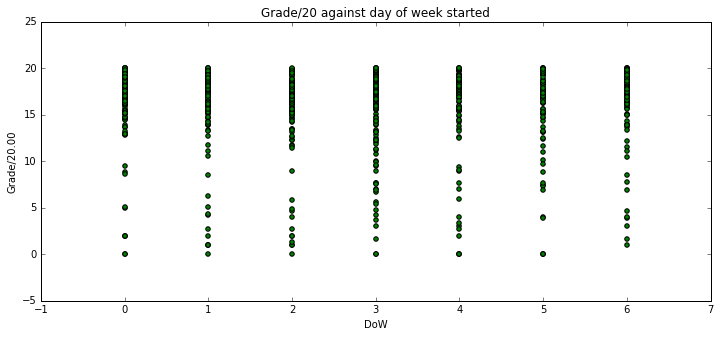

In [32]:
# Plot the results above as a scatter chart, of grade against day of week.
icma_df.plot.scatter(x='DoW', y='Grade/20.00', 
                     color='green', 
                     title="Grade/20 against day of week started",
                     figsize=(12,5))

Perform the same analysis for time of day. Find the hour that each quiz was started, and give numerical and graphical representations of the number of quizzes completed each hour and their average score. Use intermediate steps as needed.

In [33]:
#add new column, 'Hour started', calculated in the same way as day of week started
icma_df['Hour started'] = icma_df['Started on'].dt.hour


In [34]:
#check new column to make sure it looks sensible
icma_df[['Started on', 'Hour started', 'DoW']].head(5)

           Started on  Hour started  DoW
0 2016-01-29 06:56:00             6    4
1 2016-01-29 09:14:00             9    4
2 2016-01-29 11:16:00            11    4
3 2016-01-29 12:08:00            12    4
4 2016-01-29 12:51:00            12    4

In [35]:
#now lets get the number of quizzes started each hour:
quizzes_by_hour = pd.pivot_table(icma_df, index=['Hour started'], values=['Started on'], aggfunc='count')
quizzes_by_hour

              Started on
Hour started            
0                     14
1                     13
2                      1
3                      5
4                      4
5                      7
6                      8
7                     15
8                     17
9                     20
...                  ...
14                    70
15                    68
16                    57
17                    50
18                    47
19                    60
20                    68
21                    44
22                    46
23                    19

[24 rows x 1 columns]

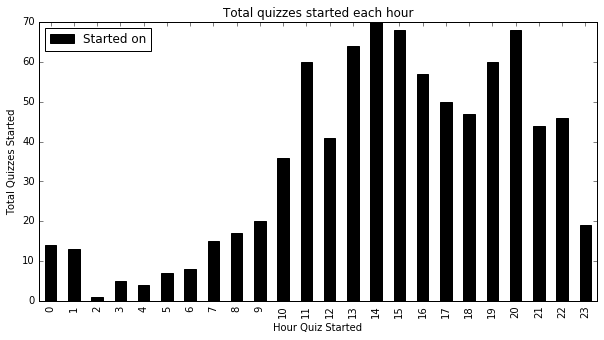

In [36]:
# Plot the results above as a bar chart.
quizzes_by_hour.plot.bar(title="Total quizzes started each hour",
                        figsize=(10,5),
                        color='black')
plt.xlabel('Hour Quiz Started')
plt.ylabel('Total Quizzes Started')

In [37]:
#now lets calculate the mean score for every hour the quiz was started
mean_quiz_score_by_hour = pd.pivot_table(icma_df, index=['Hour started'], values=['Grade/20.00'], aggfunc='mean')
mean_quiz_score_by_hour

              Grade/20.00
Hour started             
0               16.025714
1               16.346154
2               17.430000
3               18.872000
4               17.310000
5               14.474286
6               16.341250
7               13.199333
8               16.137059
9               17.723000
...                   ...
14              15.919714
15              15.693971
16              16.463509
17              15.677600
18              16.554681
19              15.874000
20              16.275441
21              16.864091
22              15.306522
23              14.786316

[24 rows x 1 columns]

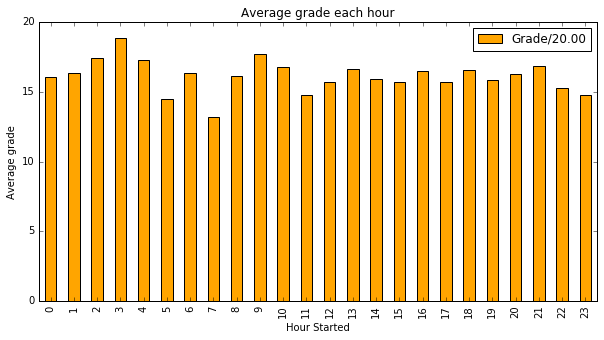

In [38]:
#and finally, lets plot the above table in a bar chart
mean_quiz_score_by_hour.plot.bar(title="Average grade each hour", 
                               figsize=(10,5),
                               color='orange')
plt.xlabel('Hour Started')
plt.ylabel('Average grade')

Do the complete and incomplete quiz attempts have a different distribution of starting times?

Generate two plots in one figure, with the finished quiz times above the in-progress quiz times. Give each plot a title and perhaps a different colour. (Keeping calls of 
```
plt.tight_layout()
fig.subplots_adjust(top=0.90)
```
to the very end of your code cell can improve the layout.)

Use `reindex()` and `fillna()` to fill in any missing groups so that both graphs have the same number of data points.

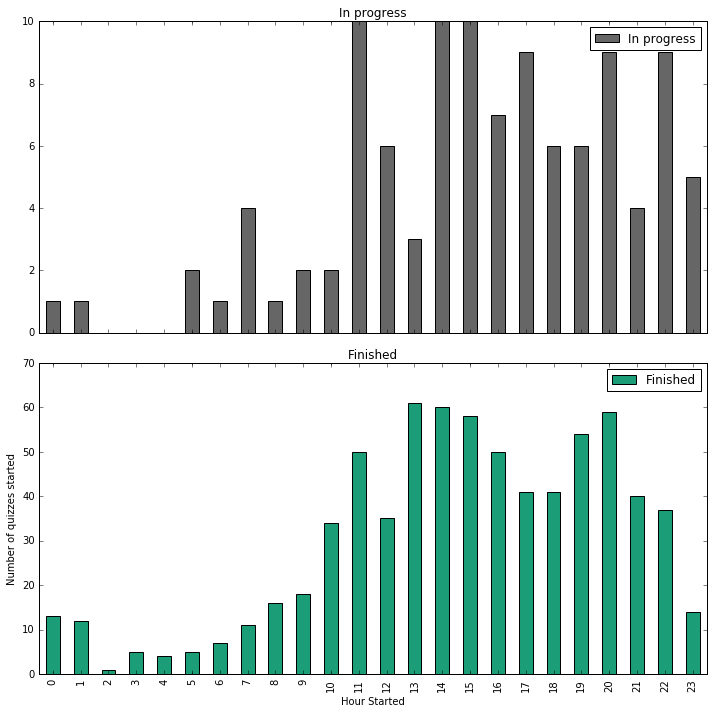

In [39]:
fig = plt.figure(figsize=(8, 8))
fig.suptitle("Attempts by hour", fontsize='x-large')

#lets pivot icma_df again, this time on Hour started and State
#NB unstack turns the 2 state rows / hour into 2 columns
quizzes_by_hour_and_state = pd.pivot_table(icma_df, index=['Hour started', 'State'], 
                                           values=['Grade/20.00'], 
                                           aggfunc='count').unstack() 

#now we reset the index (so we can plot Hour Started), and fill NaNs with 0s
quizzes_by_hour_and_state.reset_index(inplace=True)
quizzes_by_hour_and_state.fillna(0, inplace=True)
quizzes_by_hour_and_state.columns = ['Hour started', 'Finished', 'In progress']

#now lets plot the number of quizzes attempted by hour, for finished and in progress students
quizzes_by_hour_and_state.plot.bar(
                               x=['Hour started'],
                               y=['In progress', 'Finished'],
                               figsize=(10,10),
                               subplots=True,
                               colormap='Dark2_r')
plt.xlabel('Hour Started')
plt.ylabel('Number of quizzes started')

# Keep these lines at the end
plt.tight_layout()
fig.subplots_adjust(top=0.90)

# NB would have been much quicker to do a histogram here: E.g.
#icma_df.hist(column='Hour started',
#                bins=range(25),
#                by=['State'],
#                figsize=(15,5))
#which I think gives the same result!


## Analysis
What does these plots and summaries of the data tell you about how the time of day quiz affects the score of that quiz?

**Write your answer here** _(150 words)_
The time of day doesn't seem to be a significant factor in the grade obtained. The (orange) chart which shows the average grade / hour does seem to peak at 3am, and 9am, and dip at around 7am. However, when we look at the distribution of start times we can clearly see the peak time which students choose to take their tests are between 12 and 3pm, and again between 7 and 8pm. This seems to be true for both complete and incomplete quizzes (see above bar chart). The 3am peak in average grade obtained is therefore based on a small number of students (5 or so), and so can be ignored as the only thing it tells us is that a small number of students work best in the middle of the night! 

There seems to be another peak of average score at around 9am. This could indicate that students perform better when tested in the morning, but again this is only based on around 20 or so students which is too small a sample (compared to the other students tested) to draw any conclusions. In the end it may only tell us that some students are 'morning people'.

Ultimately, I think this data reflects that there are a mixture of study patterns which suit different students - some work best in the morning, others in the middle of the night. Most students however, will take their tests between 12 and 3pm, or 7 and 8pm, and performance seems reasonably similar regardless. 

Interestingly, the day of week charts show that a) less students take quizzes on Fridays and Saturdays, and b) students tend to do better if they take quizzes on Sundays and Mondays.

# <a name="e"></a> e) Difficulty of questions (7 marks)
([Contents](#contents))

Which questions are harder? 

Note that we can judge difficulty in two ways: lower grades for particular questions, or fewer questions answered (students tend to avoid questions they perceive as difficult).

Generate graphs to show the number of scores for each question. Generate three graphs, for all attempts, completed quizzes, and in-progress quizzes. 

Plot the three graphs, one above the other, in one figure. Give each subplot a title and use different colours for each plot. Again, `plt.tight_layout()` and `fig.subplots_adjust()` may improve the appearance.

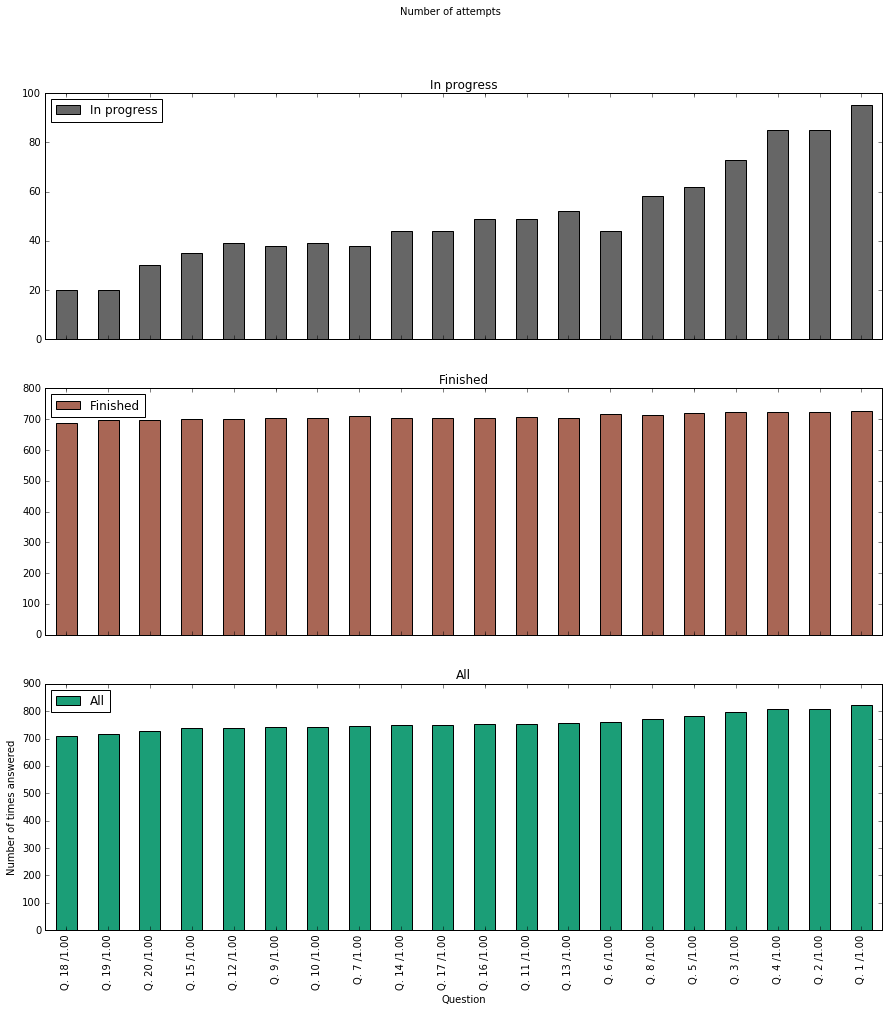

In [40]:
#firstly, we need to read in the csv file again, as we've already filled NA values with 0
#we need to go back to the raw data, so we can count the number of non-null (i.e. answered)
#values for each question

icma_raw_df = pd.read_csv('data/icma.csv', parse_dates=['Started on','Completed'], na_values=['-'])

#now we can pivot on state, sum all non-NA values, and just report on the question colums
#margins=true gives us a total column
questions_answered = pd.pivot_table(icma_raw_df, index=['State'], values=question_columns, aggfunc='count', margins=True)

#we need to transpose the table, to get the questions on the bottom.
questions_answered = questions_answered.T
#we need to reset the index to be able to use the question column
questions_answered.reset_index(inplace=True)
questions_answered.rename(columns={'index':'Question'}, inplace = True)
#lets sort the results by average score to make it easier to interpret the graph
questions_answered.sort_values(by='All', inplace=True)
#now we can plot the number of scores for each question
questions_answered.plot.bar(title="Number of attempts", 
                               x=['Question'],
                               y=['In progress', 'Finished', 'All'],
                               figsize=(15,15),
                               subplots=True,
                               colormap='Dark2_r')
plt.xlabel('Question')
plt.ylabel('Number of times answered')

Create a scatter plot that shows the number of questions answered (_x_ axis) against the grade for that quiz attempt (_y_ axis). You may find it easier to add a column to the `icma_df` DataFrame to store the number of attempted questions.

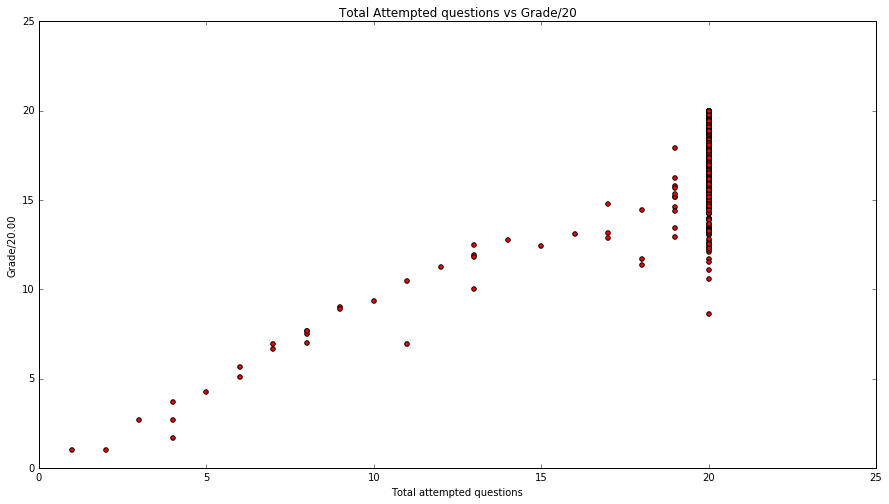

In [ ]:
# first, lets create a new column 'Total attempted questions' 
icma_raw_df['Total attempted questions'] = icma_raw_df[question_columns].count(axis=1)

# Plot the results above as a scatter chart, with no of questions answered on the x-axis, 
#and grade on the y-axis
icma_raw_df.plot.scatter(x='Total attempted questions', y='Grade/20.00', 
                     color='red', 
                     title="Total Attempted questions vs Grade/20",
                     figsize=(15,8))

Similar to the counts above, produce three charts that show the mean scores for each question. You should have one graph for all attempts, one for completed attemtps, and one for in-progress attempts. Ensure you are taking the average per question, not the score per attempt.

In [ ]:
#fig = plt.figure(figsize=(8, 10)) # Make the whole figure big enough to see the individual graphs.

#fig.suptitle("Mean scores", fontsize='x-large')

#now we can pivot on state, calculate the mean for all non-NA values, and just report on the question colums
#margins=true gives us a total column
avg_question_score = pd.pivot_table(icma_raw_df, index=['State'], values=question_columns, aggfunc='mean', margins=True)

#we need to transpose the table, to get the questions on the bottom.
avg_question_score = avg_question_score.T
#we need to reset the index to be able to use the question column
avg_question_score.reset_index(inplace=True)
avg_question_score.rename(columns={'index':'Question'}, inplace = True)
#lets sort the results by average score to make it easier to interpret the graph
avg_question_score.sort_values(by='All', inplace=True)

#now we can plot the average score for each question
avg_question_score.plot.bar(title="Average score per question", 
                              x=['Question'],
                              y=['In progress', 'Finished', 'All'],
                              figsize=(15,15),
                              subplots=True,
                              colormap='Purples')
plt.xlabel('Question')
plt.ylabel('Average score')

Generate a bar chart that shows two columns for each question. One column should show the number of attempts at that question, the other column should show the mean score. You should rescale the number of question attempts to fit the range 0–1 so that the two types of data a visible on the same graph. 

Use only data from completed quiz attempts.

You may need to generate intermediate DataFrames as you go. 

In [ ]:
from pandas import DataFrame
#we want a table, with q1 - 20 as rows, and an attempts and average score column
#first, lets discard all non-completed rows, and only keep the question columns
question_attempts = icma_raw_df[icma_raw_df['State'] == 'Finished']
question_attempts = question_attempts[question_columns]

#next, lets get the column count and mean from the question_attempts dataframe

#get total question attempts, divided by 1000
question_count = question_attempts.count() / 1000

#get mean score for each question
question_average = question_attempts.mean()

#now we can build a new dataframe from the count and mean series above
question_attempts_vs_mean_score = DataFrame(data={'Attempts':question_count, 
                                                  'Average score':question_average})
#lets sort the dataframe
question_attempts_vs_mean_score.sort_values(by='Average score', inplace=True
                                           )
#now we can plot the above table
question_attempts_vs_mean_score.plot.bar(title="Numbef of attempts vs Average score", 
                              figsize=(15,8),
                              colormap='Blues')
plt.xlabel('Question')
plt.ylabel('Number of attempts (thousands) and Average score (max score = 1)')

## Analysis
What does these plots and summaries of the data tell you about which questions are harder?

**Write your answer here** _(150 words)_
The data plots seem to paint a clear picture as to the difficulty of the questions in this quiz. If we take the first measure of difficulty, the number of times a question is attempted, we can see from the first chart that Questions 18, 19 and 20 have the least attempts, in particular for students who didn't complete the Quiz. Question 6 also proved tricky for in progress students (grey chart), but not so for the completed students (red chart). 

If we take the other measure of difficulty (average question score), we can see from the purple bar charts that Question 18, 20 and 6 have the lowest average score, for both in progress and completed students.

These findings are again reflected in the final (blue) chart, which shows number of attempts and average score plotted together. For Question 18, 20 and 6 it seems that the difficulty of the question is reflected in both the low number of attempts and the low average score. Question 19 is interesting however, in that it was the 2nd least attempted question but only the 5th lowest average score, suggesting the question was easier than anticipated by students who attempted it.

# <a name="f"></a> f) Data investigation summary (5 marks)
([Contents](#contents))

Look back over the analysis you have produced. Summarise the main conclusions you have drawn from this work. Highlight how different results can be combined to deduce more about the dataset. Take note of these questions:

* What conclusions can you draw about how and when students answer the iCMAs, and any effects that may have on the quiz grade? 

* What are the differences between the completed and in progress quiz attempts?

If you were extending this exploration, how might you proceed? 

**Write your answer here**  _(400 words)_
This analysis has yielded some interesting insights into students' study patterns and their results for this quiz. The data showed performance was very high in this quiz, with 87% of all  attempts completed, and only 13% remaining uncompleted. Of those completed attempts 25% scored 19/20 or above, and over half gained 17.8 or above. Of those students who completed the quiz, it was also clear that a good proportion (12.5%) took the quiz multiple times in order to gain a higher score (with 1 student taking the quiz 11 times!).

Of those students who didn't complete a quiz attempt, the data suggests that 17% of those students would have scored 15/20 or above, suggesting that these students would have performed better than they realised, or that in some cases perhaps students forgot to press submit. 

Examining the effect of the time and day the test was started, it is clear that most students take their tests between 12 and 3pm, and that students tend not to take tests on a Friday or Saturday. Students who took their tests on a Sunday or Monday tended to get a higher grade on average, though there didn't seem to be any obvious correlation between the time a test was started and the final grade.

The amount of time taken on the quiz was also examined. This showed that 75% of attempts are completed within 22 days, and 50% within 2 hours. There was no obvious correlation between time taken and grade achieved within this time frame, although the data showed a gentle downwards trend in grade for tests which took over 3 weeks to complete (suggesting students had forgotten the material), and a marked deterioration in grade for tests completed in under 15 minutes (suggesting students hadn't taken the time to read or understand the questions properly).

In terms of question difficulty, this was measured in 2 ways: number of times a question was attempted (with harder questions being attempted less), and average score gained for that question. Using both measures this showed that question 6, 18 and 20 were found especially difficult by students. Question 19 was the 2nd least attempted question, but only the 5th lowest average score, suggesting that once students tackled they performed reasonably. This could suggest a poorly worded question.  

While these findings are interesting, its important to bear in mind that this analysis is based on a single test, and so its difficult to draw more general conclusions about student study patterns and performance on ICMAs. More broad and general conclusions could be made from analysing more data across several ICMAs for these students (longitudinal data), or by increasing the number of data points across several tests from other modules (cross sectional data). Another interesting area of research would be to investigate the effect of retaking a quiz on the final grade, an effect which was only explored for 1 student in this analysis.


# <a name="g"></a> g) Anonymisation and privacy (10 marks)
([Contents](#contents))

The raw data for this question contained students' full names, personal email addresses, OU computer usernames, and personal identifiers. Open University students, as part of their registration agreement, give permission to The Open University for their personal data to be used internally for analysis and research.

## i) (4 marks)
What issues would there be in releasing this data for analysis by TM351 students? What laws would govern the disclosure of this data, and would unredacted data release be legal? In what way are full names, email addresses, OU computer usernames, and personal identifiers "personal data"? What other information in the dataset could be used to identify individuals?

Justify your answers.

**Write your answer here**  _(300 words)_
Data on students ICMA performance is clearly a requirement for the OU, as this data forms part of the students' academic record. It is also of use in monitoring student performance, study patterns, gauging the difficulty of tests and courses etc. Such data however, is classed as personal data under the Data Protection Act 1998, and therefore places legal obligations on the OU as the 'data controller' in protecting the student's data. 

If the OU were planning on releasing the data for analysis without redacting or anonymising any data, they would be breaching the 'fair and lawful' processing principle of the DPA. This principle puts legal responsibly on the OU (the 'data controller') to prevent personal data being disclosed to anyone other than the student it related to (the 'data subject'). 'Personal data' is defined as any data relating to living individuals by which an individual can be identified, either on its own or by cross-referencing with other available data. As the OU's ICMA data contains the names, email addresses and usernames of students, this data is explicitly personal data. It could be used for unsolicited marketing or publication without the student's consent. As the data relates to a course offered by the OU, this data could also be cross-referenced with other publically available information (linked in or facebook for example), to identify individuals.

 As long as the data allowed students to be identifiable, there would be a breach of the DPA if this data was release (unless a case could be made for such a release to be considered 'fair and lawful' processing). In order for this data to be released legally the OU would have to break the link between the data, and the identity of the students. This can be achieved through a variety of techniques including redacting (removing) sensitive parts of the data (such as names), or anonymising the data so that it no longer identifies an individual (through aggregation or obfuscation).


## ii) (4 marks)
One approach to obscuring the data is to use a cryptographic hash function, such as MD5. Such a hash function is deterministic (each value always results in the same hash), one-way (the original value cannot be recovered from the hashed value), and collision-free (two different values will not generate the same hashed value). See the examples below:

In [ ]:
import hashlib

print('TM351', hashlib.md5('TM351'.encode('ascii','ignore')).hexdigest())
print('TM352', hashlib.md5('TM352'.encode('ascii','ignore')).hexdigest())
print('tm351', hashlib.md5('tm351'.encode('ascii','ignore')).hexdigest())

This technique could be used easily with the iCMA data by applying such a hash function to some of the data (name, email address, personal identifier, OU username) and only releasing the hashed values. 

What form of anonymisation is this? 

What are the advantages and disadvantages of this approach? How could data, obscured in this way, be used to deanonyimise some or all of the data? 

(For information, the data in this released dataset had the personal identifiers replaced (masked) by randomly-generated keys. Nonce values for other personal information were generated deterministically from the new personal identifiers. These values were then hashed and stored.)

**Write your answer here**  _(250 words)_
This is an example pseudonymisation, where personal data is anonymised by replacing the personal attributes with another value or code (in this case, by replacing the name, email address, personal identifier and OU username with hashed values). 

This approach has the advantage of allowing a record relating to an individual student to be kept intact, retaining all relevant details, and to be linked to other related records, but without revealing the identity of the student. If the hash function is of sufficient strength, and doesn't allow you to work out the original data from the hashed value (one-way), this can be a very effective means of protecting personal data.

There are weaknesses to this approach however. Sometimes, despite pseudonymisation, an individual can still be reidentified. However strong a hashing function is, there may be other data available in the public domain which allows a 'motivated intruder' to combine other data sources together and deduce the identify of an individual (or at least narrow the possibilities down to a small number of individuals). This is especially true in small datasets, where the very presence or absence of a record can allow reidentification when combined with other easily available data such as electoral registers.

Sadly, it is impossible to be certain that reidentification won't be possible now or in the future. The best that can be done is to reduce the risk by taking adequate precautions are taken (such as reviewing existing public sources of information, or performing a 'motivated intruder' test) and weigh up the possible risks and benefits of this form of anonymization over other methods.


## iii) (2 marks)
Give two other approaches that could be used to anonymise the iCMA data so it could be published for analysis? What are their disadvantages?

**Write your answer here**  _(200 words)_
Other anonymization methods which could be used are suppression (redaction) or aggregation.

Suppression means suppressing any personal data before release. In this example, it could mean removing the student's name, email address etc. This approach carries the same risks as pseudonymisation, in that given a sufficiently motivated individual and other data to cross-reference against, the student could be re-identified.

Aggregation means aggregating all student records together, and releasing summary data which related to the group of students as a whole, rather than individuals (for instance, average mark, average time spent on a quiz etc.). This method has the advantage that it almost impossible to re-identify individuals with a sufficiently large dataset, as data relating to individuals has been discarded and rolled up into summary values. However, as the dataset gets smaller the likelihood of identification increases. For this reason, summary values relating to small populations are often suppressed before release.


### 45 marks in total